# Soluções relativas aos execícios da Aula 15

## Exercício 1

Implementar o método de Newton em alta dimensão

Comecemos com um exemplo simples para encontrarmos o zero da função.

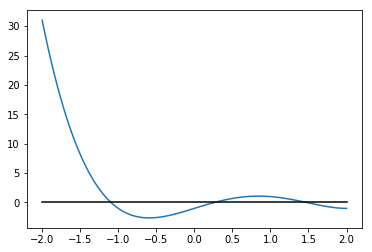

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)

f1 = lambda x: x**4 - 3*x**3 + 4*x - 1
df1 = lambda x: 4*x**3 - 9*x**2 + 4

y = f1(x)
zero = np.zeros_like(x)
plt.plot(x, y)
plt.plot(x, zero, c="black")
plt.show()

Prosseguimos implementando o Método de Newton 2D para encontrar algum zero dessa função.

In [38]:
def find_zero2D(init_guess, f, df, it=1000):
    guesses = [init_guess]
    for i in range(it):
        guesses.append(guesses[-1] - f(guesses[-1])/df(guesses[-1]))
    return np.array(guesses)

Experimentemos com três inicializações diferentes para ver para quais zeros de função elas convergem.

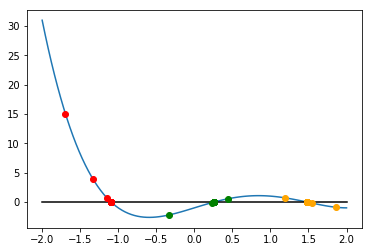

In [54]:
###################################################
np.random.seed(1)
init_guess = np.random.rand(1)*4 - 2
guesses = find_zero2D(init_guess, f1, df1)

plt.plot(x, y, zorder=1)
plt.plot(x, zero, c="black", zorder=2)
plt.scatter(guesses, f1(guesses), c="green", zorder=3)

# plt.show()
###################################################
np.random.seed(4)
init_guess = np.random.rand(1)*4 - 2
guesses = find_zero2D(init_guess, f1, df1)

# plt.plot(x, y, zorder=1)
# plt.plot(x, zero, c="black", zorder=2)
plt.scatter(guesses, f1(guesses), c="orange", zorder=3)

# plt.show()


###################################################
np.random.seed(7)
init_guess = np.random.rand(1)*4 - 2
guesses = find_zero2D(init_guess, f1, df1)

# plt.plot(x, y, zorder=1)
# plt.plot(x, zero, c="black", zorder=2)
plt.scatter(guesses, f1(guesses), c="red", zorder=3)

plt.show()

Podemos obsvervar que dependendo de onde escolhemos o chute inicial, acabamos encontrando um valor diferente de zero de função. Nesse caso, os pontos vermelhos convergem para o zero da esquerda, os verdes para o do meio e os laranjas para o da direita.

Seria interessante ter mapeado que pontos levam para que zeros no gráfico todo.

In [62]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = x.min() - .5, x.max() + .5
    y_min, y_max = y.min() - .5, y.max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(xx.ravel(), yy.ravel())
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.plot(x, y)

In [66]:
def pred(x, y):
    np.random.seed(1)
    init_guess = np.random.rand(1)*4 - 2
    z1 = find_zero2D(init_guess, f1, df1)[-1]
    
    np.random.seed(4)
    init_guess = np.random.rand(1)*4 - 2
    z2 = find_zero2D(init_guess, f1, df1)[-1]
    
    np.random.seed(7)
    init_guess = np.random.rand(1)*4 - 2
    z3 = find_zero2D(init_guess, f1, df1)[-1]
    
    classes = []
    for i in x:
        zero_found = find_zero2D(i, f1, df1)
        classes.append(np.argmin([np.absolute(z1 - zero_found), np.absolute(z2 - zero_found), np.absolute(z3 - zero_found)]))
    return np.array(classes)

In [ ]:
plot_decision_boundary(pred)